# Tutorial

In this tutorial we are going to use [**DuckDB**](https://duckdb.org/docs/installation/index?version=stable&environment=cli&platform=win&download_method=package_manager) instead of previous used SQLite.

## CREATE Table

**How does the syntax of an CREATE statement look?**


```sql
CREATE TABLE IF NOT EXISTS table_name 
(
    column_1 datatype optional_constranit ,
    column_2 datatype optional_constranit ,
    ...
    column_n datatype optional_constranit
)
```

In [ ]:
!pip install duckdb duckdb-engine jupysql 

In [ ]:
import duckdb

# Connect to an existing DuckDB database file
con = duckdb.connect(database='database.duckdb')

In [ ]:
%load_ext sql

%config SqlMagic.displaycon = False
%config SqlMagic.feedback = False

%sql duckdb:///database.duckdb

In [ ]:
%%sql
-- Know tables in my database
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'main';


### Exploring the Database

Let us create a new two tables, PETSALE and PET. 

In [ ]:
# %%sql
# drop table PET;
# drop table PETSALE;

In [ ]:
%%sql
CREATE TABLE IF NOT EXISTS PETSALE (
    ID INTEGER NOT NULL,
    PET CHAR(20),
    SALEPRICE DECIMAL(10, 2),
    PROFIT DECIMAL(10, 2),
    SALEDATE DATE
);

CREATE TABLE IF NOT EXISTS PET (
    ID INTEGER NOT NULL,
    ANIMAL VARCHAR(20),
    QUANTITY INTEGER
);

-- Know tables in my database
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'main';

Now, insert some records into the two newly created tables. You can also add SELECT statements to print the contents of the tables once they are loaded with data.

In [ ]:
%%sql
INSERT INTO PETSALE VALUES
        (1,'Cat',450.09,100.47,'2018-05-29'),
        (2,'Dog',666.66,150.76,'2018-06-01'),
        (3,'Parrot',50.00,8.9,'2018-06-04'),
        (4,'Hamster',60.60,12,'2018-06-11'),
        (5,'Goldfish',48.48,3.5,'2018-06-14');
        
INSERT INTO PET VALUES
        (1,'Cat',3),
        (2,'Dog',4),
        (3,'Hamster',2);


In [ ]:
%%sql
SELECT * FROM PETSALE;

In [ ]:
%%sql
SELECT * FROM PET;

## ALTER statement

### 1. Adding a column

Add a new column named QUANTITY to the PETSALE table and display the altered table.

In [ ]:
%%sql
ALTER TABLE PETSALE
ADD COLUMN QUANTITY INTEGER;

SELECT * FROM PETSALE;

Now update the newly added QUANTITY column of the PETSALE table with some values and show all the table records.

In [ ]:
%%sql
UPDATE PETSALE SET QUANTITY = 9 WHERE ID = 1;
UPDATE PETSALE SET QUANTITY = 3 WHERE ID = 2;
UPDATE PETSALE SET QUANTITY = 2 WHERE ID = 3;
UPDATE PETSALE SET QUANTITY = 6 WHERE ID = 4;
UPDATE PETSALE SET QUANTITY = 24 WHERE ID = 5;

SELECT * FROM PETSALE;

### 2. Deleting a column

Delete the PROFIT column from the PETSALE table and show the altered table. 

In [ ]:
%%sql
ALTER TABLE PETSALE
DROP COLUMN PROFIT;

SELECT * FROM PETSALE;

### 3. Modify a column

**Change the data type to `VARCHAR(20)` type of the column `SALEDATE` of the table `PETSALE` and show the altered table.** 

`CHAR(20)`:
- Fixed Length: The CHAR data type is a fixed-length type. When you define a column as CHAR(20), it will always take up 20 bytes of storage, regardless of the actual length of the string stored. If the string is shorter than 20 characters, it will be padded with spaces to meet the specified length.
  
`VARCHAR(20)`:
- Variable Length: The VARCHAR data type is a variable-length type. When you define a column as VARCHAR(20), it can store any length of string up to 20 characters. The actual storage size is based on the length of the string plus an additional byte or two to store the length information.

In [ ]:
%%sql
ALTER TABLE PETSALE
ALTER COLUMN SALEDATE SET DATA TYPE VARCHAR(20);
SELECT * FROM PETSALE;

In [ ]:
%%sql
PRAGMA table_info(PETSALE);

In [ ]:
# Execute PRAGMA table_info command
result = con.execute('PRAGMA table_info(PETSALE);').fetchall()
print(result)

### 4. Rename a Column

Rename the column PET to ANIMAL of the PETSALE table and show the altered table.

In [ ]:
%%sql
ALTER TABLE PETSALE 
RENAME COLUMN PET TO ANIMAL;

SELECT * FROM PETSALE;


## TRUNCATE

Let's remove all rows from the PET table and show the empty table.

In [ ]:
%%sql
TRUNCATE TABLE PET ;

SELECT * FROM PET;

## DROP statement

Finally, you will use the DROP statement to delete an existing table. Let's delete the PET table and verify if the table still exists or not (the SELECT statement should give an error if a table doesn't exist). 

In [ ]:
%%sql
DROP TABLE PET;

SELECT * FROM PET;

# Practice problems

#### 1. Create a new table in the database named `Toys` with attributes as `ID (integer)`, `Variety (variable length string - 20)`, and `Quantity (integer)`. **Make sure the ID is not Null**.

In [ ]:
%%sql
-- your answer here


<details><summary>Click here for the solution</summary>

```sql
CREATE TABLE Toys (
        ID INTEGER NOT NULL,
        Variety VARCHAR(20),
        Quantity INTEGER
        );
```


</details>

#### 2. Add the below-mentioned entries to the table using the INSERT statement.

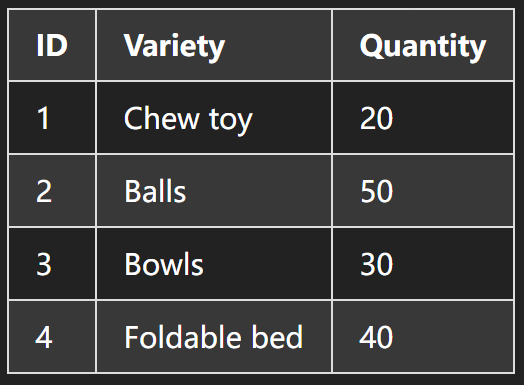

In [ ]:
%%sql
-- your answer here

<details><summary>Click here for the solution</summary>

```sql
INSERT INTO Toys VALUES
        (1, 'Chew toy', 20),
        (2, 'Balls', 50),
        (3, 'Bowls', 30),
        (4, 'Foldable bed', 40);

SELECT * FROM Toys;
```


</details>

#### 3. Change the type of 'Quantity' in the table to DECIMAL(10,0)

In [ ]:
%%sql
-- your answer here


<details><summary>Click here for the solution</summary>

```sql
%%sql
ALTER TABLE Toys
ALTER Quantity SET DATA TYPE DECIMAL(10,0);

```


</details>

In [ ]:
# Confirm the new edited type 
result = con.execute('PRAGMA table_info(Toys);').fetchall()
print(result)

#### 4. TRUNCATE the table 'Toys'

In [ ]:
%%sql
-- your answer here


<details><summary>Click here for the solution</summary>

```sql
TRUNCATE TABLE Toys;

SELECT * FROM Toys;

```


</details>

#### 5. DROP the table 'Toys'

In [ ]:
%%sql
-- your answer here

<details><summary>Click here for the solution</summary>

```sql
DROP TABLE Toys;
```


</details>

# Author: 
- Eng. **Mohamed Soliman**